# Heart Disease Dataset

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

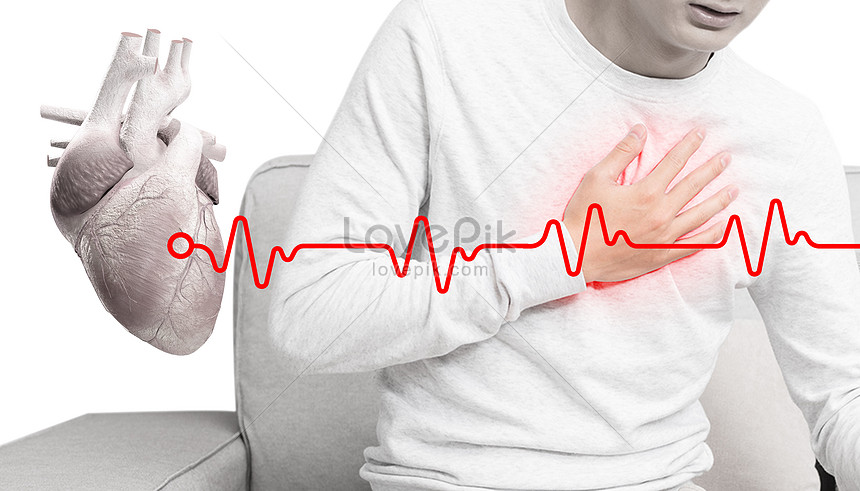

## Objective :

The objective of this notebook is to predict the presence of heart disease in the patient.

### About Dataset

__Context :__
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the data 

In [2]:
df = pd.read_csv("C:/Users/Viraj/OneDrive/Desktop/DevTown/heart.csv")

In [3]:
df.head() #top 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


__Attribute Information:__

    1.age(age of the patient)
    2.sex (1= Male, 0= Female)
    3.chest pain (4 values - 0, 1, 2, 3)
    4.resting blood pressure
    5.serum cholestoral in mg/dl
    6.fasting blood sugar > 120 mg/dl
    7.resting electrocardiographic results (values 0,1,2)
    8.maximum heart rate achieved
    9.exercise induced angina
    10.oldpeak = ST depression induced by exercise relative to rest
    11.the slope of the peak exercise ST segment (3 values - 0, 1, 2)
    12.number of major vessels (0-4) colored by flourosopy
    13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect; 3 =

In [45]:
for column in df.columns:
    unique_values = df[column].unique()
    
    # Check if the number of unique values exceeds 5
    if len(unique_values) > 5:
        value_range = f"Range: {min(unique_values)} - {max(unique_values)}"
        print(f"Column '{column}': {value_range}")
        print("==========================================")
    else:
        print(f"Column '{column}': {unique_values}")
        print("==========================================")

Column 'age': Range: 29 - 77
Column 'sex': [1 0]
Column 'cp': [0 1 2 3]
Column 'trestbps': Range: 94 - 200
Column 'chol': Range: 126 - 564
Column 'fbs': [0 1]
Column 'restecg': [1 0 2]
Column 'thalach': Range: 71 - 202
Column 'exang': [0 1]
Column 'oldpeak': Range: 0.0 - 6.2
Column 'slope': [2 0 1]
Column 'ca': [2 0 1 3 4]
Column 'thal': [3 2 1 0]
Column 'target': [0 1]


### EDA

In [4]:
df.shape

(1025, 14)

There are total 1025 rows and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


If we see the datatypes of the attributes, we can notice that all datatypes are integer datatypes except the one of oldpeak attribute which is float datatype.

In [49]:
gender_counts = df['sex'].map({1: 'Male', 0: 'Female'}).value_counts()
print(gender_counts)

Male      713
Female    312
Name: sex, dtype: int64


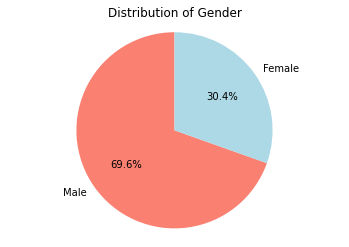

In [62]:
gender_labels = ['Male', 'Female']
gender_colors = ['salmon', 'lightblue']

gender_counts = df['sex'].map({1: 'Male', 0: 'Female'}).value_counts()

plt.pie(gender_counts, labels=gender_labels, colors=gender_colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Distribution of Gender')

plt.show()

Out of 1025 records, 69.6% (713) records are of males and 30.4% (312) records are of females

In [82]:
target_labels = {1: 'Positive', 0: 'Negative'}
target_counts = df['target'].map(target_labels).value_counts()
print(target_counts)

Positive    526
Negative    499
Name: target, dtype: int64


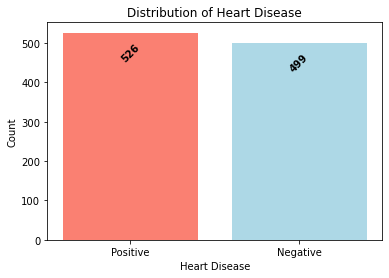

In [98]:
plt.bar(target_counts.index, target_counts, color=['salmon', 'lightblue'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

for i, count in enumerate(target_counts):
    plt.text(i, count-50, str(count), ha='center', va='center', rotation=45, fontweight='bold')

plt.show()

Out of 1025 records, 526 records are positive(having disease) and 499 records are negative(doesn't have disease), which are nearly same according to our records.

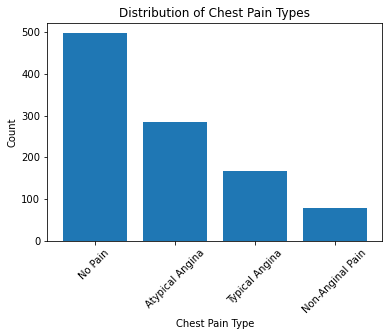

In [101]:
cp_labels = {0: 'No Pain', 1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain'}
cp_counts = df['cp'].map(cp_labels).value_counts()

plt.bar(cp_counts.index, cp_counts)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.xticks(rotation=45)
plt.show()

 Here most of the records are of No Pain followed by Atypical Angina, Typical Angina, Non-Anginal Pain

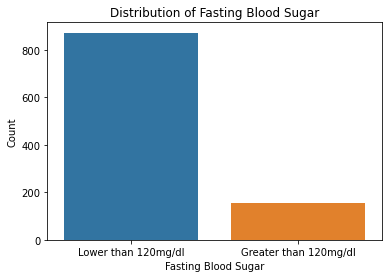

In [102]:
fbs_labels = {0: 'Lower than 120mg/dl', 1: 'Greater than 120mg/dl'}

sns.countplot(df['fbs'].map(fbs_labels))
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

- The graph indicates that the majority of individuals in the dataset have fasting blood sugar levels lower than 120mg/dl. 
- This suggests that a significant number of individuals have blood sugar levels within a normal range and a smaller proportion of individuals in the dataset have elevated fasting blood sugar levels.

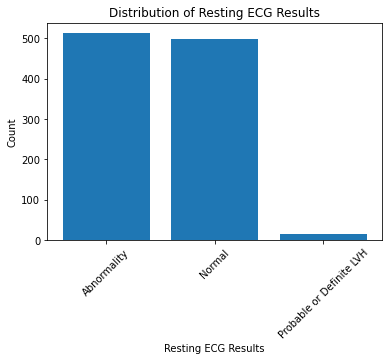

In [103]:
restecg_labels = {0: 'Normal', 1: 'Abnormality', 2: 'Probable or Definite LVH'}
restecg_counts = df['restecg'].map(restecg_labels).value_counts()

plt.bar(restecg_counts.index, restecg_counts)
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Results')
plt.xticks(rotation=45)
plt.show()

- The graph is showing that Abnormality is the most common resting ECG result. This suggests that a significant number of individuals in the dataset had abnormal resting electrocardiographic results according to the assessment criteria used.
- Then a considerable number of individuals had normal resting electrocardiographic results during the assessment
- Fewer individuals were identified as having probable or definite left ventricular hypertrophy (LVH) based on the resting ECG results.

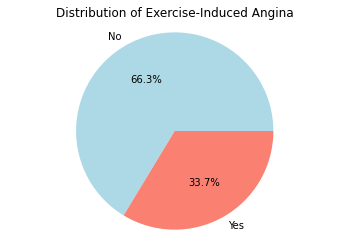

In [104]:
exang_labels = {0: 'No', 1: 'Yes'}
exang_counts = df['exang'].map(exang_labels).value_counts()

plt.pie(exang_counts, labels=exang_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.axis('equal')
plt.title('Distribution of Exercise-Induced Angina')
plt.show()

- The graph shows that the majority of records (66.3%) correspond to "No" for exercise-induced angina. This suggests that a significant proportion of individuals in the dataset did not experience angina induced by exercise
- A smaller proportion (approximately 33.7% of the records) of individuals in the dataset experienced angina induced by exercise, as per the provided labels.

In [12]:
cat_values = []
conti_values = []

for col in df.columns:
    if len(df[col].unique()) >= 10:
        conti_values.append(col)
    else:
        cat_values.append(col)
        
print("catageroy values: ", cat_values)
print("continous values: ", conti_values)

catageroy values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


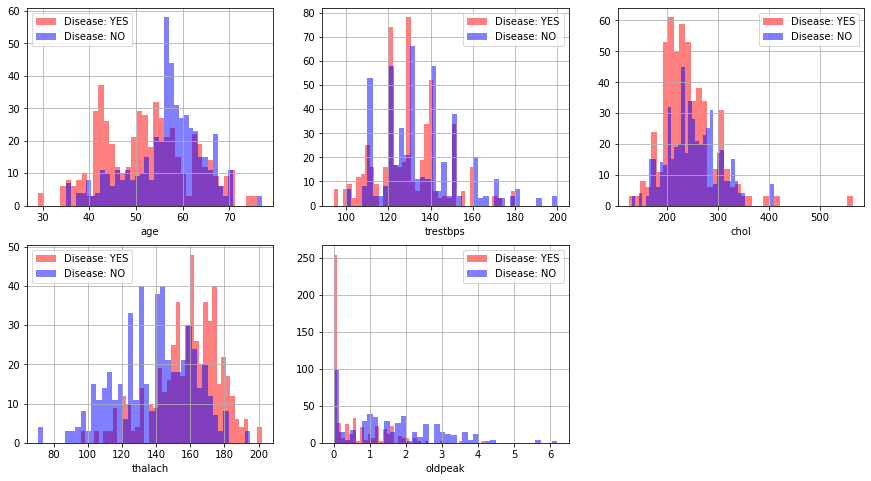

In [13]:
plt.figure(figsize=(15,8))

for i, col in enumerate(conti_values, 1):
    plt.subplot(2,3,i)
    df[df.target ==1][col].hist(bins=40, color='red', alpha=0.5,  label='Disease: YES')
    df[df.target ==0][col].hist(bins=40, color='blue', alpha=0.5,  label='Disease: NO')
    plt.xlabel(col)
    plt.legend()

- trestbps[resting bp] anything above 130-140 is generally of concern
- chol[cholesterol] greater than 200 is of concern
- thalach People over 140 value are more likely to have heart disease
- oldpeak with value 0 are more than likely to have heart disease than any other value

### Data Preprocessing

__Checking for null value__

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null value present.

__Checking Correlation using Heatmap__

<AxesSubplot:>

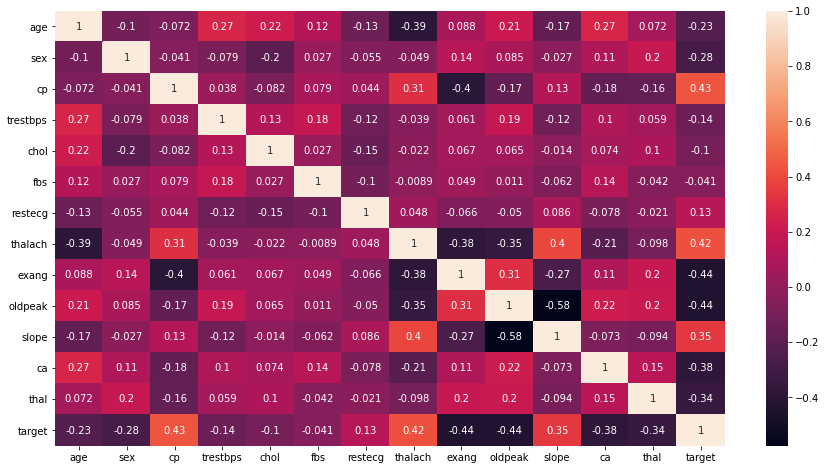

In [14]:
x = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

1. It is clearly visible that no column is a significant contributor among all the features.
2. So we are going to take all the features for the model evaluation.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Outliers can be seen in various columns of the dataset. So moving onto the next method which is Boxplots for the better view of the outliers

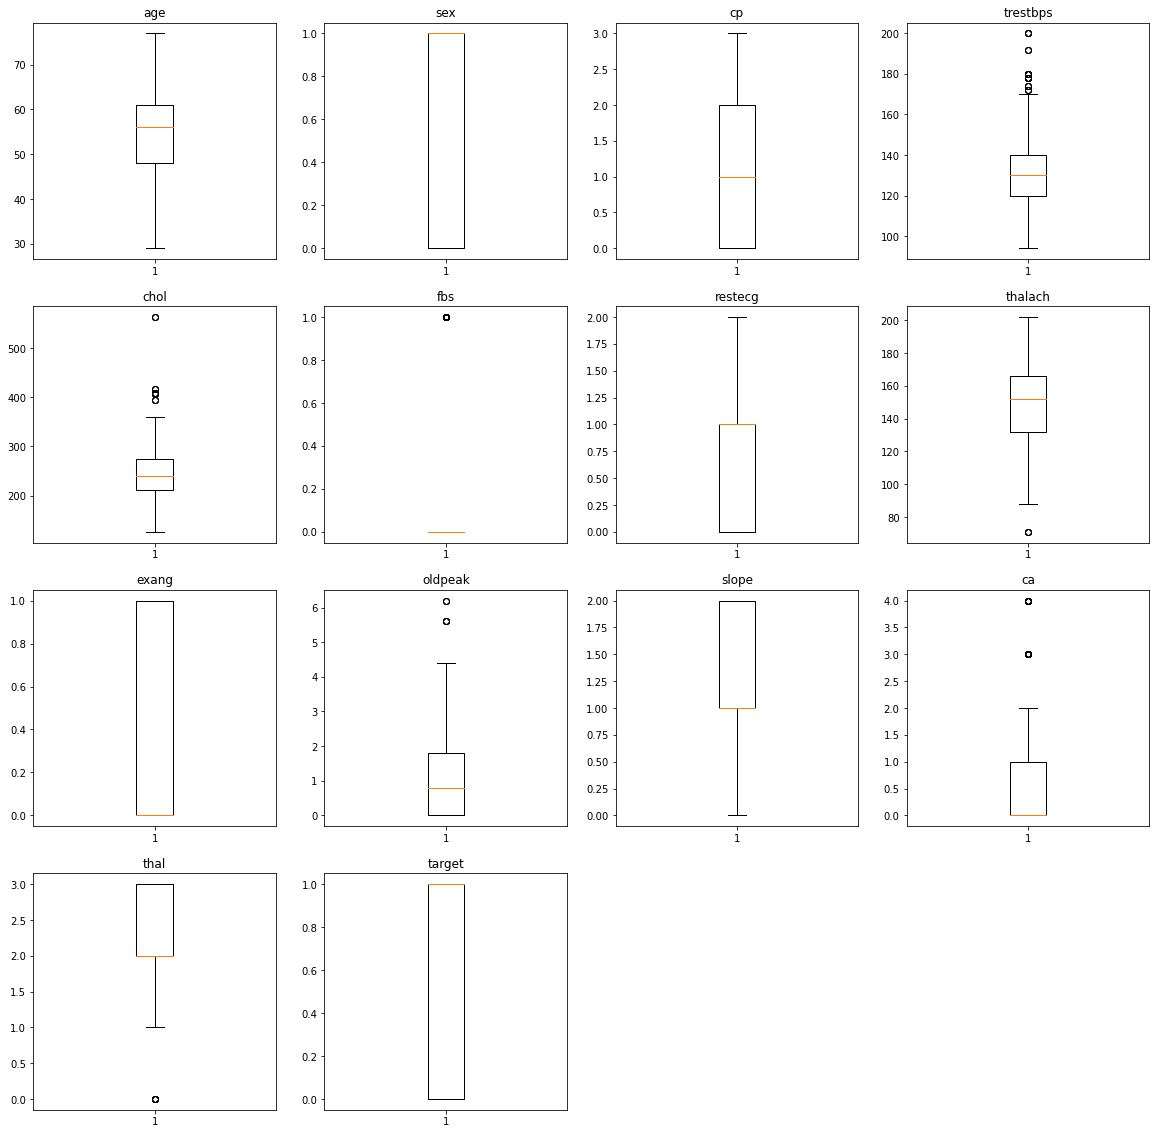

In [16]:
x = 1
plt.figure(figsize = (20,20))

for i in df.columns:
    plt.subplot(4,4,x)
    plt.boxplot(df[i])
    plt.title(i)
    x = x+1

Maximum number of outliers can be seen in the column 'trestbps'.

__Removing outliers from 'trestbps' column.__

In [17]:
q1 = df['trestbps'].quantile(q = 0.25)
q3 = df["trestbps"].quantile(q = 0.75)
IQR = q3 - q1

IQR_lower_limit = int(q1 - (1.5*IQR))
IQR_upper_limit = int(q3 + (1.5*IQR))

print("Upper limit of IQR:",IQR_upper_limit)
print("Lower limit of IQR:",IQR_lower_limit)

cleaned_data = df[df["trestbps"]<IQR_upper_limit]

Upper limit of IQR: 170
Lower limit of IQR: 90


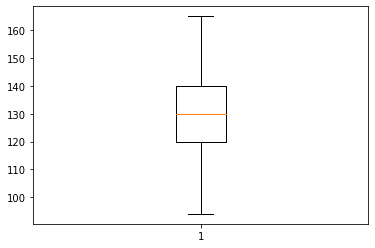

In [18]:
plt.boxplot(cleaned_data["trestbps"]);

Here we can see the outliers from trestbps column are removed

In [19]:
cleaned_data.shape

(980, 14)

So now there are only 980 rows left in the dataset after clearing the outliers and the 14 columns as they were.

### One Hot Encoding 

In [20]:
cat_values.remove('target')
cleaned_data = pd.get_dummies(cleaned_data, columns=cat_values)

### Train - Test Split

In [21]:
X = cleaned_data.drop(columns = 'target')
y = cleaned_data['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[conti_values] = sc.fit_transform(X_train[conti_values])
X_test[conti_values] = sc.transform(X_test[conti_values])

### Applying Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred_test = logreg.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
lr_acc_score=accuracy_score(y_test, y_pred_test)
lr_acc_score

0.8673469387755102

Our model is __86.73 %__ accurate by applying Logistic regeression

In [28]:
confusion_matrix(y_test, y_pred_test)

array([[82, 13],
       [13, 88]], dtype=int64)

__Model_prediction :__

    - Type_1 Error: 13 were diagnosed positive when they were not having the disease.
    - Type_2 Error: 13 were diagnosed negative when they actually having the disease.

### ROC_AUC_SCORE AND ROC_CURVE

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

In [30]:
roc_score = roc_auc_score(y_test,y_pred_test)
roc_score

0.8672225117248566

In [31]:
tpr, fpr, thresholds = roc_curve(y_test, y_pred_test)

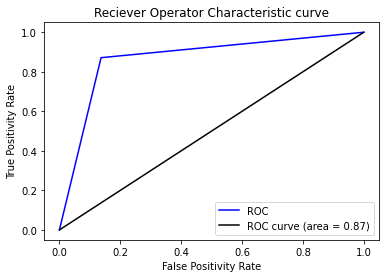

In [32]:
plt.plot(tpr, fpr, color = 'blue', label = 'ROC')
plt.plot([0,1],[0,1],color = 'black', label = 'ROC curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("Reciever Operator Characteristic curve")
plt.legend()
plt.show()

- The AUC represents the area under the ROC curve, which is a plot of the true positive rate against the false positive rate at various probability thresholds. 
- The AUC score ranges from 0 to 1, where a score of 1 indicates a perfect model. 
- A score of 0.5 indicates a random classifier.

__AUC : 0.87__ - It suggests that the model has a good ability to distinguish between positive and negative cases. It indicates that the model is performing significantly better than a random classifier.

### Applying other Machine Learning Algorithms

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)
print(nb_acc_score)

0.8418367346938775


Our model is __84.18 %__ accurate by applying Naive Bayes

In [35]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(rf_acc_score)

0.9285714285714286


Our model is __92.86 %__ accurate by applying Random Forest Classfier

In [36]:
m4= 'K-Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_acc_score)

0.8826530612244898


Our model is __88.27 %__ accurate by applying K-Neighbors Classifier

In [37]:
m5 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_acc_score)

0.9387755102040817


Our model is __93.88 %__ accurate by applying Decision Tree Classifier

In [38]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.734694
1,Naive Bayes,84.183673
2,Random Forest,92.857143
3,K-Nearest Neighbour,88.265306
4,Decision Tree,93.877551


# Conclusion

Over all the Machine Learning Algorithms, __Decision Tree(93.88 %)__ and __Random Forest(92.86 %)__ Algorithm gives us the best Accuracy.